In [1]:
 from google.colab import files
uploaded = files.upload()

Saving Harry Potter and the Socerer's stone .pdf to Harry Potter and the Socerer's stone .pdf


In [2]:
!pip install -q pymupdf
!pip install -U spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import fitz

filename = list(uploaded.keys())[0]
doc_pdf = fitz.open(filename)

text = ""
for page in doc_pdf:
    text += page.get_text()


In [4]:
import spacy
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 29.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
ifilename = list(uploaded.keys())[0]
doc_pdf = fitz.open(filename)

text = ""
for page in doc_pdf:
    text += page.get_text()

In [6]:
doc = nlp(text)


In [7]:
print(doc)

1
Harry Potter and the Sorcerer's Stone
CHAPTER ONE
THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache. Mrs. Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. They didn't
think they could bear it if anyone found out about the Potters. Mrs.
P

In [8]:
import re

# This pattern splits on headings like "CHAPTER ONE", "CHAPTER TWO", etc.
chapters = re.split(r'(?:CHAPTER|Chapter)\s+(?:[A-Z]+)', text)
chapters = [c.strip() for c in chapters if len(c.strip()) > 500]

print(f"Number of chapters found: {len(chapters)}")



Number of chapters found: 17


In [9]:
import re

# This pattern splits on headings like "CHAPTER ONE", "CHAPTER TWO", etc.
chapters = re.split(r'(?:CHAPTER|Chapter)\s+(?:[A-Z]+)', text)
chapters = [c.strip() for c in chapters if len(c.strip()) > 500]

print(f"Number of chapters found: {len(chapters)}")
print("Sample from Chapter 1:")
print(chapters[0][:300])


Number of chapters found: 17
Sample from Chapter 1:
THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.
Mr. Dursley was the


In [10]:
for i, chapter in enumerate(chapters, 1):
    globals()[f"chapter_{i}"] = chapter
print(chapter_1)  # First 500 characters of Chapter 1




THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much. They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made
drills. He was a big, beefy man with hardly any neck, although he did
have a very large mustache. Mrs. Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. They didn't
think they could bear it if anyone found out about the Potters. Mrs.
Potter was Mrs. Dursley's sister, but they hadn't met

In [11]:
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00


In [12]:
# Dictionary to store sentiment results
chapter_sentiments = {}

for i in range(1, len(chapters) + 1):
    chapter_var = globals()[f"chapter_{i}"]
    sentiment = analyzer.polarity_scores(chapter_var)
    chapter_sentiments[f"chapter_{i}"] = sentiment


In [13]:
print("Chapter 1 Sentiment:")
print(chapter_sentiments["chapter_1"])


Chapter 1 Sentiment:
{'neg': 0.064, 'neu': 0.837, 'pos': 0.099, 'compound': 0.9996}


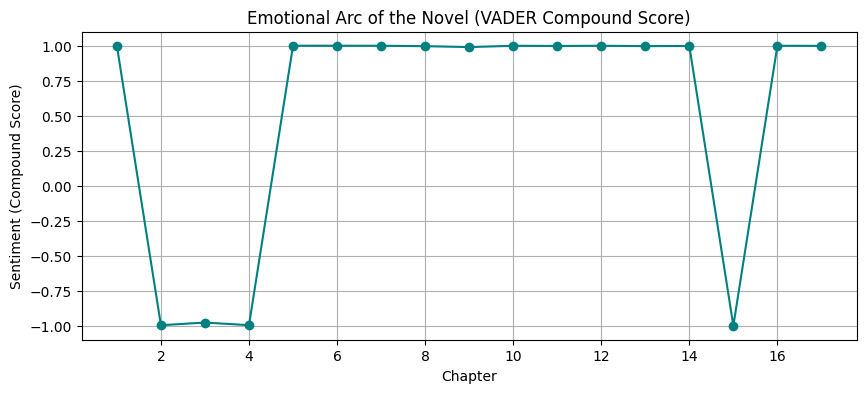

In [14]:
import matplotlib.pyplot as plt

chapter_nums = list(range(1, len(chapters) + 1))
compound_scores = [chapter_sentiments[f"chapter_{i}"]['compound'] for i in chapter_nums]

plt.figure(figsize=(10, 4))
plt.plot(chapter_nums, compound_scores, marker='o', color='teal')
plt.title("Emotional Arc of the Novel (VADER Compound Score)")
plt.xlabel("Chapter")
plt.ylabel("Sentiment (Compound Score)")
plt.grid(True)
plt.show()


In [15]:
characters = ["Harry", "Hermione", "Ron"]


In [16]:
from collections import defaultdict

# Store all sentences per character per chapter
character_mentions = {name: defaultdict(list) for name in characters}

for i, chapter in enumerate(chapters, 1):
    doc = nlp(chapter)
    for sent in doc.sents:
        for name in characters:
            if name in sent.text:
                character_mentions[name][i].append(sent.text)


In [17]:
character_sentiments = {name: {} for name in characters}

for name in characters:
    for chap_num, sentences in character_mentions[name].items():
        scores = [analyzer.polarity_scores(sent)['compound'] for sent in sentences]
        if scores:
            avg_score = sum(scores) / len(scores)
            character_sentiments[name][chap_num] = avg_score


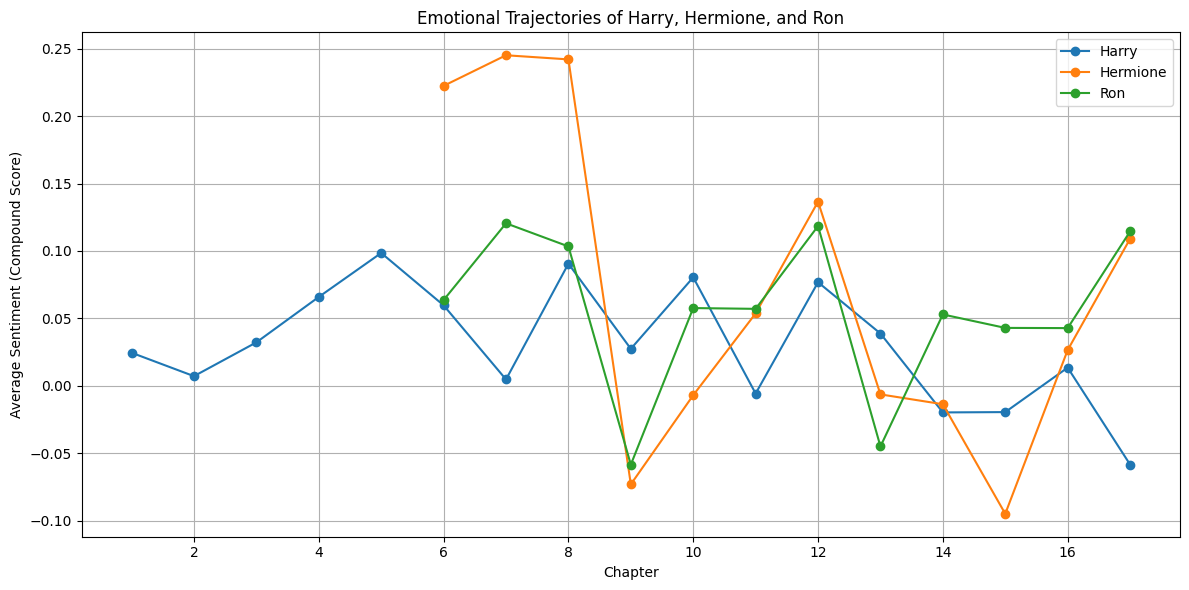

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for name in characters:
    chaps = sorted(character_sentiments[name].keys())
    scores = [character_sentiments[name][chap] for chap in chaps]
    plt.plot(chaps, scores, marker='o', label=name)

plt.title("Emotional Trajectories of Harry, Hermione, and Ron")
plt.xlabel("Chapter")
plt.ylabel("Average Sentiment (Compound Score)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
